<a href="https://colab.research.google.com/github/brandim04/CienciaDeDados/blob/main/Atvd_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nitindatta/finance-data")

print("Path to dataset files:", path)

100%|██████████| 2.89k/2.89k [00:00<00:00, 4.08MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nitindatta/finance-data/versions/1


In [4]:
import os
df = pd.read_csv(os.path.join(path, 'Finance_data.csv'))

In [5]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print(df[numeric_cols].describe())

             age  Mutual_Funds  Equity_Market  Debentures  Government_Bonds  \
count  40.000000     40.000000      40.000000   40.000000         40.000000   
mean   27.800000      2.550000       3.475000    5.750000          4.650000   
std     3.560467      1.197219       1.131994    1.675617          1.369072   
min    21.000000      1.000000       1.000000    1.000000          1.000000   
25%    25.750000      2.000000       3.000000    5.000000          4.000000   
50%    27.000000      2.000000       4.000000    6.500000          5.000000   
75%    30.000000      3.000000       4.000000    7.000000          5.000000   
max    35.000000      7.000000       6.000000    7.000000          7.000000   

       Fixed_Deposits        PPF       Gold  
count       40.000000  40.000000  40.000000  
mean         3.575000   2.025000   5.975000  
std          1.795828   1.609069   1.143263  
min          1.000000   1.000000   2.000000  
25%          2.750000   1.000000   6.000000  
50%         

Detecção de Outliers

In [6]:
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers_z = (z_scores > 3)  # Limite 3 desvios padrão
print("Número de outliers por coluna (Z-score):")
print(pd.DataFrame(outliers_z, columns=numeric_cols).sum())

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
print("Número de outliers por coluna (IQR):")
print(outliers_iqr.sum())

Número de outliers por coluna (Z-score):
age                 0
Mutual_Funds        1
Equity_Market       0
Debentures          0
Government_Bonds    0
Fixed_Deposits      0
PPF                 0
Gold                1
dtype: int64
Número de outliers por coluna (IQR):
age                 0
Mutual_Funds        3
Equity_Market       4
Debentures          1
Government_Bonds    7
Fixed_Deposits      0
PPF                 5
Gold                4
dtype: int64


Visualização

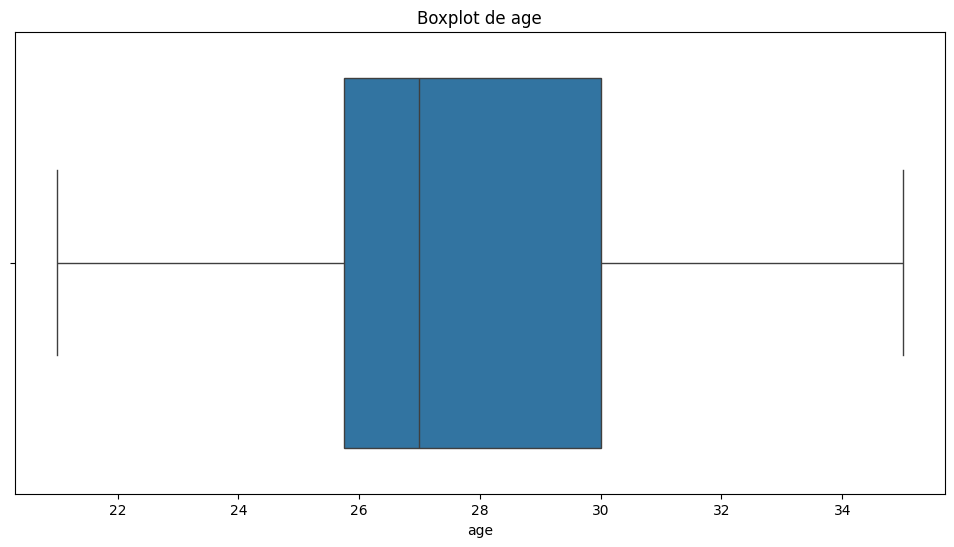

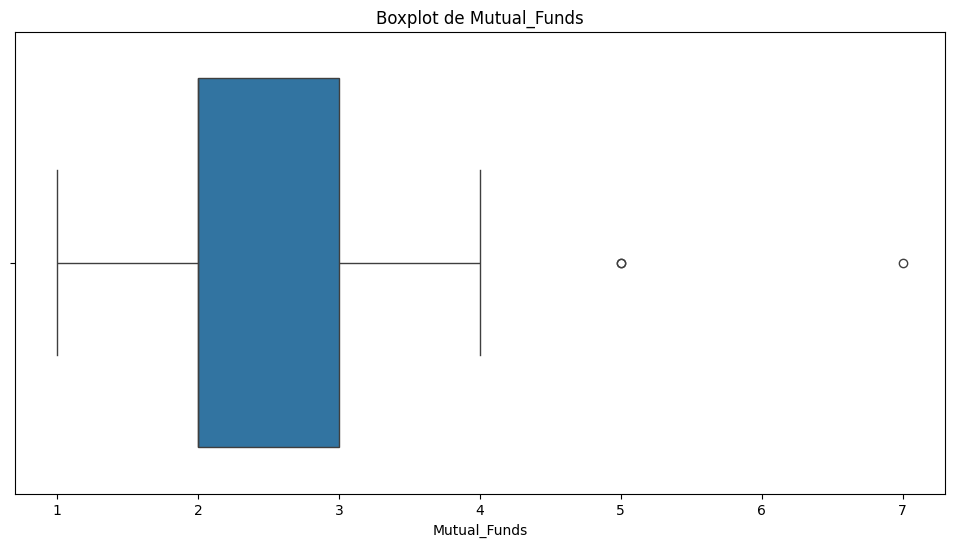

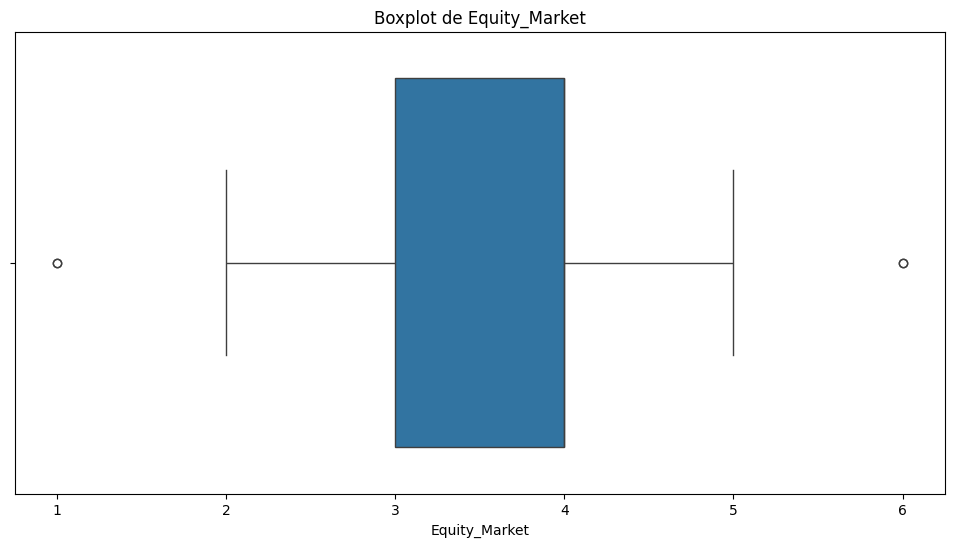

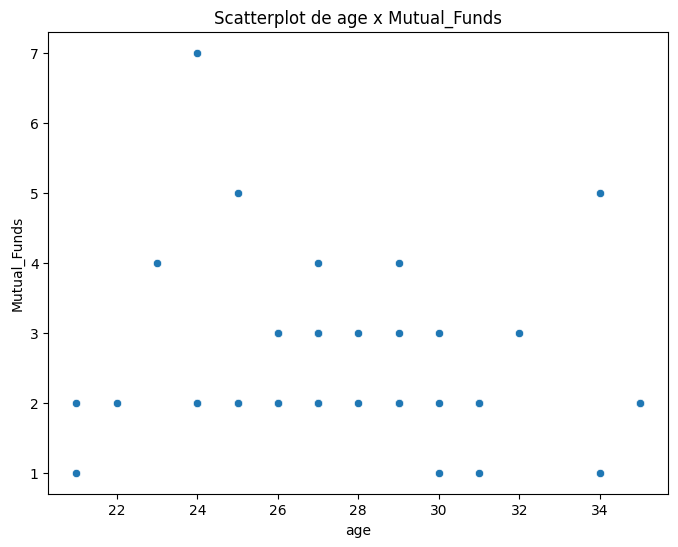

In [7]:
for col in numeric_cols[:3]:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

if len(numeric_cols) >= 2:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=df[numeric_cols[0]], y=df[numeric_cols[1]])
    plt.title(f'Scatterplot de {numeric_cols[0]} x {numeric_cols[1]}')
    plt.show()


Tratamento

In [8]:
df_no_outliers = df[(z_scores < 3).all(axis=1)]
print(f"Tamanho original: {df.shape}, Após remoção de outliers: {df_no_outliers.shape}")

df_capped = df.copy()
for col in numeric_cols:
    lower = Q1[col] - 1.5 * IQR[col]
    upper = Q3[col] + 1.5 * IQR[col]
    df_capped[col] = np.where(df_capped[col] < lower, lower, df_capped[col])
    df_capped[col] = np.where(df_capped[col] > upper, upper, df_capped[col])

df_log = df.copy()
for col in numeric_cols:
    df_log[col] = df_log[col].apply(lambda x: np.log(x+1) if x >= 0 else np.nan)

df_sqrt = df.copy()
for col in numeric_cols:
    df_sqrt[col] = np.sqrt(df_sqrt[col].clip(lower=0))

Tamanho original: (40, 24), Após remoção de outliers: (39, 24)


In [9]:
print("Estatísticas originais:")
print(df[numeric_cols].describe())
print("\nApós remoção de outliers:")
print(df_no_outliers[numeric_cols].describe())
print("\nApós capping:")
print(df_capped[numeric_cols].describe())
print("\nApós log transform:")
print(df_log[numeric_cols].describe())
print("\nApós sqrt transform:")
print(df_sqrt[numeric_cols].describe())

Estatísticas originais:
             age  Mutual_Funds  Equity_Market  Debentures  Government_Bonds  \
count  40.000000     40.000000      40.000000   40.000000         40.000000   
mean   27.800000      2.550000       3.475000    5.750000          4.650000   
std     3.560467      1.197219       1.131994    1.675617          1.369072   
min    21.000000      1.000000       1.000000    1.000000          1.000000   
25%    25.750000      2.000000       3.000000    5.000000          4.000000   
50%    27.000000      2.000000       4.000000    6.500000          5.000000   
75%    30.000000      3.000000       4.000000    7.000000          5.000000   
max    35.000000      7.000000       6.000000    7.000000          7.000000   

       Fixed_Deposits        PPF       Gold  
count       40.000000  40.000000  40.000000  
mean         3.575000   2.025000   5.975000  
std          1.795828   1.609069   1.143263  
min          1.000000   1.000000   2.000000  
25%          2.750000   1.000000  